In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
data = pd.read_csv('./data/EndofSeason.csv', index_col='playerid')

In [15]:
data.head()

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,BABIP,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR
playerid,,,,,,,,,,,,,,,,,,,,,
10155,Mike Trout,Angels,134,600,45,110,104,11,18.3 %,20.0 %,...,0.298,0.291,0.438,0.645,0.436,180,7.1,68.2,-0.4,8.6
17678,Alex Bregman,Astros,156,690,41,122,112,5,17.2 %,12.0 %,...,0.281,0.296,0.423,0.592,0.418,168,-2.1,58.3,4.4,8.4
11477,Christian Yelich,Brewers,130,580,44,100,97,30,13.8 %,20.3 %,...,0.355,0.329,0.429,0.671,0.442,174,8.5,65.3,-3.7,7.8
15998,Cody Bellinger,Dodgers,156,660,47,121,115,15,14.4 %,16.4 %,...,0.302,0.305,0.406,0.629,0.415,162,1.1,55.0,3.2,7.7
12533,Marcus Semien,Athletics,162,753,33,123,92,10,11.8 %,13.5 %,...,0.292,0.283,0.369,0.519,0.371,137,1.7,37.1,13.9,7.5


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 10155 to 9112
Data columns (total 21 columns):
Name     135 non-null object
Team     135 non-null object
G        135 non-null int64
PA       135 non-null int64
HR       135 non-null int64
R        135 non-null int64
RBI      135 non-null int64
SB       135 non-null int64
BB%      135 non-null float64
K%       135 non-null float64
ISO      135 non-null float64
BABIP    135 non-null float64
AVG      135 non-null float64
OBP      135 non-null float64
SLG      135 non-null float64
wOBA     135 non-null float64
wRC+     135 non-null int64
BsR      135 non-null float64
Off      135 non-null float64
Def      135 non-null float64
WAR      135 non-null float64
dtypes: float64(12), int64(7), object(2)
memory usage: 28.2+ KB


In [24]:
data['K%'] = data['K%'].str[:-1].astype('float64') / 100
data['BB%'] = data['BB%'].str[:-1].astype('float64') / 100

In [27]:
players = ['Bryce Harper', 'Mike Trout', 'Cody Bellinger', 'Christian Yelich', 'Rhys Hoskins', 'Nolan Arenado']

data[data['Name'] == 'Bryce Harper'].T

playerid,11579
Name,Bryce Harper
Team,Phillies
G,157
PA,682
HR,35
R,98
RBI,114
SB,15
BB%,0.145
K%,0.261


In [28]:
data.describe()

,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,144.533333,604.362963,25.629630,84.066667,80.785185,8.555556,0.090889,0.200533,0.208548,0.306444,0.272600,0.345000,0.481126,0.345578,113.962963,0.364444,11.814074,-1.233333,3.008148
std,11.555705,62.702402,10.216858,18.809017,19.594541,8.828944,0.032700,0.051306,0.056929,0.032265,0.026443,0.030974,0.066962,0.033545,22.246384,3.502951,18.135264,9.412472,2.012611
min,118.000000,503.000000,2.000000,42.000000,37.000000,0.000000,0.028000,0.091000,0.069000,0.224000,0.205000,0.280000,0.321000,0.269000,61.000000,-6.600000,-27.300000,-22.400000,-1.000000
25%,136.500000,549.000000,18.000000,70.000000,67.500000,3.000000,0.067500,0.160000,0.167500,0.285500,0.254000,0.324500,0.429500,0.319500,98.000000,-2.100000,-2.500000,-8.100000,1.550000
50%,146.000000,604.000000,25.000000,82.000000,80.000000,5.000000,0.087000,0.203000,0.214000,0.308000,0.275000,0.342000,0.477000,0.343000,112.000000,0.100000,11.300000,-1.500000,2.800000
75%,154.000000,656.500000,33.000000,97.000000,92.000000,11.000000,0.111000,0.243500,0.248000,0.327000,0.290500,0.364500,0.523000,0.370500,131.500000,2.550000,23.100000,5.150000,4.150000
max,162.000000,753.000000,53.000000,135.000000,126.000000,46.000000,0.183000,0.323000,0.353000,0.406000,0.335000,0.438000,0.671000,0.442000,180.000000,10.600000,68.200000,27.800000,8.600000


In [29]:
tmgrp = data.groupby('Team')
tmgrp['HR'].sum()

Team
- - -           150
Angels          107
Astros          178
Athletics       148
Blue Jays        46
Braves          157
Brewers         155
Cardinals       123
Cubs            146
Diamondbacks    131
Dodgers         164
Giants           48
Indians         106
Mariners         57
Marlins          47
Mets            138
Nationals       119
Orioles         102
Padres           54
Phillies        115
Pirates         111
Rangers          94
Rays             94
Red Sox         187
Reds             75
Rockies         132
Royals          103
Tigers           12
Twins           131
White Sox       117
Yankees         113
Name: HR, dtype: int64

In [30]:
data[data['Name'].isin(players)]

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,BABIP,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR
playerid,,,,,,,,,,,,,,,,,,,,,
10155,Mike Trout,Angels,134,600,45,110,104,11,0.183,0.200,...,0.298,0.291,0.438,0.645,0.436,180,7.1,68.2,-0.4,8.6
11477,Christian Yelich,Brewers,130,580,44,100,97,30,0.138,0.203,...,0.355,0.329,0.429,0.671,0.442,174,8.5,65.3,-3.7,7.8
15998,Cody Bellinger,Dodgers,156,660,47,121,115,15,0.144,0.164,...,0.302,0.305,0.406,0.629,0.415,162,1.1,55.0,3.2,7.7
9777,Nolan Arenado,Rockies,155,662,41,102,118,3,0.094,0.140,...,0.312,0.315,0.379,0.583,0.392,128,2.5,27.1,12.6,5.9
11579,Bryce Harper,Phillies,157,682,35,98,114,15,0.145,0.261,...,0.313,0.260,0.372,0.510,0.365,125,-0.6,21.9,3.4,4.6
16472,Rhys Hoskins,Phillies,160,705,29,86,85,2,0.165,0.245,...,0.267,0.226,0.364,0.454,0.347,113,-2.4,9.6,-10.5,2.1


In [44]:
print(np.percentile(data['WAR'],[25, 50, 75]))
print(pd.qcut(data['WAR'], 4))

[1.55 2.8  4.15]
playerid
10155       (4.15, 8.6]
17678       (4.15, 8.6]
11477       (4.15, 8.6]
15998       (4.15, 8.6]
12533       (4.15, 8.6]
              ...      
1744     (-1.001, 1.55]
1177     (-1.001, 1.55]
13185    (-1.001, 1.55]
3516     (-1.001, 1.55]
9112     (-1.001, 1.55]
Name: WAR, Length: 135, dtype: category
Categories (4, interval[float64]): [(-1.001, 1.55] < (1.55, 2.8] < (2.8, 4.15] < (4.15, 8.6]]


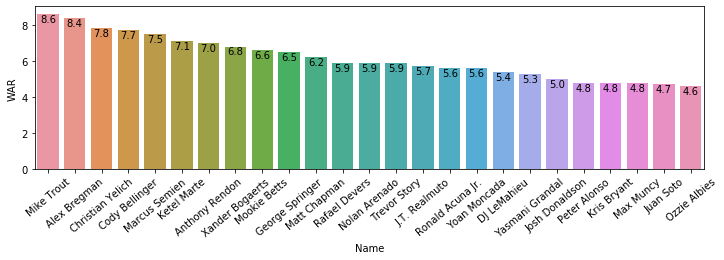

In [59]:
plt.figure(figsize=(12,3))
g = sns.barplot(x='Name',y='WAR', data=data.nlargest(25, 'WAR'))

for index, val in enumerate(data.nlargest(25, 'WAR')['WAR']):
    g.text(index,val,round(val,1), color='black', ha='center', va='top')    
    
g.tick_params(axis='x', rotation=40, left=True)


In [61]:
data['war%'] = data['WAR'].rank(pct=True)

In [65]:
data[data['Name'] == 'Bryce Harper']['war%']

playerid
11579    0.814815
Name: war%, dtype: float64